# Code Structure
In 0_Fundamentals we went on a crash course through the very basics of `python`. Before diving into to writing tons of code, we're going to look at how to structure code to set up good practices from the start. We're going learn what a `module` is, use the modules `numpy`, `matplotlib.pyplot`, and `lmfit`, and write a basic `class`.

## `module` imports and `arrays`
There are many built in functions in `python`. We don't have time to cover all of them here, but for example you can easily find the maximum or minimum value of a list using the following syntax (try running it yourself):

In [3]:
interesting_values = [1,2,3,4,5]
max_value = max(interesting_values)
min_value = min(interesting_values)
print(min_value,max_value)

1 5


However, there are many useful functions that are not immediately available, and require importing. Some functions (and classes, which we will talk about later) are stored in what are called `modules`. They are not available to use until you `import` them. One of the most useful models is called `numpy` which contains the `array` class. We want to quickly compare the behaviour of lists and arrays, so let's import the `array` class and setup a list and an array. As always, run the code whenever you see a code box:

In [4]:
from numpy import array

list_values = [1,2,3]
array_values = array([1,2,3])

print(list_values,type(list_values))
print(array_values,type(array_values))

[1, 2, 3] <class 'list'>
[1 2 3] <class 'numpy.ndarray'>


You essentially create a list of numbers, and wrap it with array() to create an `array`. At first glance, there doesn't seem to be much difference between a `list` and an `array`, however `arrays` are far more useful for arithmetic than `lists`. Let's try multiplying by three:

In [5]:
print(list_values*3)
print(array_values*3)

[1, 2, 3, 1, 2, 3, 1, 2, 3]
[3 6 9]


When you multiply a `list` by 3, it actually repeats the `list`, to return a `list` which is three times as long. When you multiply the `array` by 3, it returns an `array` where every element has been multiplied by 3.

Let's compare the behaviour of adding `list` with another `list` vs. `adding` an array to an array:

In [6]:
print(list_values + list_values)
print(array_values + array_values)

[1, 2, 3, 1, 2, 3]
[2 4 6]


By adding two `lists` together, you combine the two `lists` into one `list`. When adding `arrays`, you add all elements of the two arrays together. This means to add two arrays, they must have the same number of elements, which is called the length of the array. You can find out the length of a `list` or `array` by using

In [7]:
print(len(list_values),len(array_values))

3 3


In the `1_Code_Structure` folder, there is a file called `example_module.py`. Use your favourite text editor (e.g. notepad, vim, gedit, sublime, atom, the list goes on and on) to open and inspect the contents. Modules, or really big modules which can be called packages, are stored in this fashion. We store code in separate files for two reasons: we can write multiple scripts that call the modules, which stops us recreating code and effort; having 1000s of lines of code in a single file quickly becomes impossible to manage and debug.

You will see the first function is called polynomial, which looks like this:

```python
def polynomial(x,a=1,b=1,c=0):
    '''Returns the 2nd order polynomial of x,
    using the coefficients a,b,c as
    a*x**2 + b*x + c'''
    return a*x**2 + b*x + c
```

Let's import it, and then pass an array into it. Run the code below.

In [8]:
##Good practice to always load modules at the start of your code
##If you have any module load problems they happen at the start that way,
##rather than half way through execucution, possibly saving you time
##Note in the import, we don't need the .py extension
from example_module import polynomial
from numpy import array

x_values = array([1,2,3])
result = polynomial(x_values)
print(result)

[ 2  6 12]


Because we can do arithmetic directly on an `array`, we can directly input `x_values` into the function without a `for` loop. Not only does this save lines of code, it is also far quicker to run on the computer.

You may have noticed in the definition of `polynomial`, I set default values for `a,b,c`, which means we didn't have to input values to use the function. However, we still have the option to change them. These are know as 'optional arguments'. There are a number of ways we can change the values - inspect and run the code below for a couple:

In [9]:
from example_module import polynomial
from numpy import array,arange

x_values = array([1,2,3])

##This is the equivalent of setting a=2,b=3,c=4
result = polynomial(x_values,2,3,4)
print(result)

##We can set the variables explicitly as well
result = polynomial(x_values,a=2,b=3,c=4)
print(result)

##And we can also change just one of the optional arguements
result = polynomial(x_values,b=3)
print(result)

##Setting the c variable as an array
result = polynomial(x_values,b=3,c=arange(3))
print(result)


[ 9 18 31]
[ 9 18 31]
[ 4 10 18]
[ 4 11 20]


Now try adding the code above to have `c` equal an `array` of numbers - make sure the values you output make sense to you. This is another useful trait of `arrays`.

***
## <font color=blue>Exercise 2.1</font>

Speaking of the speed of lists vs. arrays let's try timing some of our code. In the code below, we going to use the `time` function from the `time` module. This converts the current time reported by your computer into seconds, so if we call the time function before and after running our code, we can see how long the code takes in seconds. To call it we need to add the parentheses after like this `time()`.

We will use the `log` function from `numpy`, which calculates the natural logarithm, to do 1 million calculations via a `for` loop and directly via an `array`. Read the comments in the code below and fill in the missing parts.

In [10]:
from time import time
from numpy import log, arange

##Do it via a list and loop------------------------------
##-------------------------------------------------------
##Set up a range of 1 million integers
x_values = range(1,1000001)

##Record the time before your list calculation
time_start = time()

##YOUR CODE HERE======================================
log_loop = []
for x in x_values:
    log_loop.append(log(x))
##YOUR CODE HERE======================================
    
##Record the time after the loop and work out how long it took
time_finish = time()
time_list = time_finish-time_start
print("List+loop operation took",time_list,"seconds")

##Do it via arrays---------------------------------------
##-------------------------------------------------------
##arange is the array equivalent of the range function.
##It returns and array instead of a list
x_values = arange(1,1000001)

time_start = time()

##YOUR CODE HERE======================================
log_array = log(x_values)
##YOUR CODE HERE======================================

time_finish = time()

time_array = time_finish-time_start
print("Array operation took",time_finish-time_start,"seconds")
print("Array operation was", time_list/time_array, "times faster!")


List+loop operation took 1.07499098777771 seconds
Array operation took 0.009640693664550781 seconds
Array operation was 111.50556434860026 times faster!


If you write your code correctly, the array operation should be far faster. How much faster depends on your computer. Mine was about 50 times faster! For this reason, when running computations, always try to use arrays.
***

## Jupyter notebook vs text files
There are a few different ways to run `python` code. We will only focus on two ways in this course - via the Jupyter notebooks as we have done so far, and by creating python text files, which can be run on the command line.

The other common way of running python is by using a text file or 'script'. We can write the python code directly into the script, and then run it on the command line. The command line is accessed by either opening up a terminal (on a Mac or Linux based computer) or command prompt (on a windows machine). The command line looks something like this:

![terminal_screenshot.png](terminal_screenshot.png)

This kind of programming is more traditional, and is more convenient for complicated programmes. It also requires less 'overhead', as the computer doesn't need to run a browser session or store variables in between running code.

#### <font color=red>A note on operating systems</font>
The command line (launched via terminal in Mac/Linux) works differently from the (command prompt in Windows). I use Ubuntu (a Linux OS), so my screen shots may look different to what you see. The underlying difference is Mac/Linux is based on Linux, whereas Windows is based on DOS. I've included a quick comparison of commands used on the command line here that differ between DOS and Linux. A longer comparison is found [here](http://www.yolinux.com/TUTORIALS/unix_for_dos_users.html). Note that if you use the conda power shell prompt on your Windows machine, your command will be the same as the Linux commands.

| Windows | Mac/Linux | Command Use | Example Linux Command
| - | - | - | - |
| `cd..` | `cd ..` | Changed directory | `cd ..` (will move one directory up) |
| `dir` | `ls` | List a files in current directory | `ls` |
| `copy` | `cp` | Copies a file from one location to another | `cp file.txt /home/new_directory` |
| `move` | `mv` | Moves a file from one location to another | `mv file.txt /home/new_directory` |
| `del` | `rm` | Delete file | `rm file.txt` |

Ok, let's try running running an example script.

***
## <font color=blue>Exercise 2.2</font>
Ask your lecturers to help you open and navigate in a terminal/command prompt/conda prompy if you are unsure how. There are quite a few ways to do it which vary from computer to computer.

Go to the directory `/some-path-here/KAS2020_repo/1_Code_Structure`. Once there, type in the `ls` (Linux) or `dir` (Windows) to see the contents. You should see a file called `example_script.py`. Type the following command in:

```
python example_script.py
```
you should hopefully have something like this pop up

![simple_plot.png](simple_plot.png)

You can play with zooming and dragging the plot around. Once done, shut the plot.
***

Open up `example_script.py` with a text editor. You can see we do some imports, define a simple function, but there is also this new thing which we haven't seen before:

```python
if __name__ == "__main__":
    ##Then a bunch of code here
```

We saw earlier that we store modules in exactly the same way, in a `.py` extension file. When you run the command `python example_script.py` on the command line, the computer designates `example_script.py` as the `__main__` code. The line `if __name__ == "__main__":` is a logic test that checks whether we are running `example_script.py` as the main code, and then executes the code below if true. The reason we do this is so we can *also* use `example_script.py` as a *module*. Try the following import:

In [11]:
from example_script import third_order_polynomial
print(third_order_polynomial(2))

14


Notice how we didn't get a plot appearing - that's because this time `example_script.py` was imported, and so wasn't given the `__main__` label. 

Whether you run your commands through a Jupyter notebook or on the command line is up to you. Try both methods and see which one makes you the most comfortable, the most productive. Being familiar with both is good. One thing to note is that if you are editing a module, and want to check it's behaviour in a notebook, you will have to restart the notebook kernel. We will run into this later on.

## Looking at `Classes`
We are going to take a *brief* look at what a `Class` is. When you begin writing your computational project code for this summer school, you don't have to use them (of course you can use them if they are helpful and you are confident!) But it is good at this point to at least see one, so it's in the back of your mind when designing code. For far more detail than we'll go into, go [here](https://docs.python.org/3/tutorial/classes.html).

A `Class` is essentially a way to bundle functionality together into what's called an 'object'. You design this object from the bottom up, and make custom behaviours for the object. It's useful for when you have a number of possible operations you'd like to do multiple times, and saves you writing lots of lines of code.

Let's look at an example. I'm a radio astronomer, so I often need to look at the spectra (the brightness of the galaxy as a function of emitting frequency) of galaxies that emit radio waves. A simple type of radio galaxy has a spectra that can be modelled by

$$ S = S_0\nu^\alpha $$

where $S$ is the flux density (how bright it appears, measured in Jy), $S_0$ is a reference flux density, $\nu$ is the frequency, and $\alpha$ is the spectral index of the source.

In `example_module.py` you should see the following code:

```python
class Spectra():
    '''A simple class to extrapolate and plot spectra for a basic astronomical radio source'''
    def __init__(self,SI,frequency,flux):
        '''Takes the spectral index, reference frequency, and refrence flux
        of a generic radio spectra and initiales the Spectra class.
        Caculate s0 as defined by the equation flux = S0*frequency**SI'''
        self.flux = flux
        self.SI = SI
        self.frequency = frequency
        self._s0 = flux / frequency**SI
        
    def extrapolate_flux(self,frequencies):
        '''Extrapolate fluxes to match the given frequencies'''
        return self._s0 * frequencies ** self.SI
    
    def plot_spectra(self,frequencies):
        '''Do a basic plot of the spectra for these frequencies'''
        plt.plot(frequencies,self.extrapolate_flux(frequencies))
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Flux (Jy)')
        plt.show()
```

Let break this down. The line

```python
class Spectra():
```
is similar to `def function()` in that we are starting a new `class`, and we want to call it `Spectra`. Notice how I've used a capital in the name; it's a quick way to visually know whether you are using a `function` or a `class`, and is standard practice. Anything that follows this line and is indented goes into defining this `class`. Again, we immediately use a docstring to describe the `class`. We then see

```python
    def __init__(self,SI,frequency,flux):
        '''Takes the spectral index, reference frequency, and refrence flux
        of a generic radio spectra and initiales the Spectra class.
        Caculate s0 as defined by the equation flux = S0*frequency**SI'''
        self.flux = flux
        self.SI = SI
        self.frequency = frequency
        self._s0 = flux / frequency**SI
```
Here we are defining a special function (a function within a class is called a method, just to add even *more* language). The `__init__` method is automatically run upon the creation of the `class`. You should notice there is an argument called `self`. Luckily, the computer isn't becoming self aware, `self` refers to the object were are creating, the `class` itself. Really what it means is that you define a function that sets up this `class` and is able to edit it.

`SI,frequency,flux` are all arguments that I wanted to add every time we call this `class`. You can add as many as you like, just like a normal function. By adding the line `self.flux = flux`, we are setting an 'attribute' of our class. We can access attributes once we have called the `class`. Let's demonstrate for clarity:


In [12]:
from example_module import Spectra

this_spectra = Spectra(SI=-0.8,frequency=180e+6,flux=10)
print(this_spectra.SI)
print(this_spectra.frequency)

-0.8
180000000.0


So we create an object `this_spectra`, which is an *instance* of the `class` Spectra. `this_spectra` has attributes called `flux`,`SI`, and `frequency`, which we can access by putting a period after the object and typing the name of the attribute i.e. `this_spectra.flux`.

You may have noticed another attribute, `_s0`. When you start an attribute with an underscore `_`, this typically signifies that the user doesn't need to use this attribute - it's used by the `class` itself to carry out a method later on. Don't worry too much about that for now.

Ok, so the next set of code defines a new method like this:

```python
def extrapolate_flux(self,frequencies):
        '''Extrapolate fluxes to match the given frequencies'''
        return self._s0 * frequencies ** self.SI
```

This `method` is simply calculating $S = S_0\nu^\alpha$, for a given frequency $\nu$. Again, we have set `self` as an argument, as this allows this `method` to access the attributes, meaning the user doesn't have to input them every time they want to call the `method`. Now we see why we calculated `_s0` with `__init__` - this way we only need to do the calculation once, and can call `extrapolate_flux` as many times as we want. Let's use `extrapolate_flux` below:


In [13]:
##we have already created this_spectra, 
##so we don't need to call Spectra again
from numpy import arange

##The frequencies I typically observe at are 50-250MHz
freqs = arange(50e+6,250e+6,50e+6)

##We need to feed frequencies into the method this_spectra,
##which we call in the same way as an attribute
extrap_fluxes = this_spectra.extrapolate_flux(freqs)

print(extrap_fluxes)

[27.86390627 16.00361165 11.57031005  9.19166119]


The final block of code defines another `method`:

```python
def plot_spectra(self,frequencies):
        '''Do a basic plot of the spectra for these frequencies'''
        ##plt.plot(x,y) basically plots x vs y
        plt.plot(frequencies,self.extrapolate_flux(frequencies))
        ##plt.xlabel, plt.ylabel change the x and y labels
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Flux (Jy)')
        ##plt.show() shows the plot
        plt.show()
```
This generates a simple plot of the spectra for a give range of frequencies. Inside `example_module.py` we have already called `import matplotlib.pyplot as plt` so we can use it here. Because we have `self` as an argument, we can access the method `extrapolate_flux` to calculate the spectra. This is often one of the advantages of using a `class` - having many useful pats of code being able to access the same methods, some the user never need see. Let's run plot_spectra below:

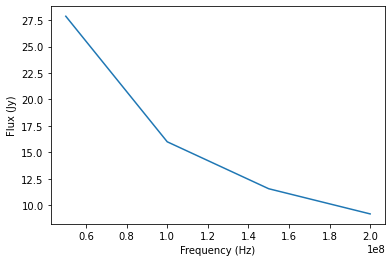

In [14]:
this_spectra.plot_spectra(freqs)

Not the most exciting plot but we generated it with a `class`, and saw all the underlying code structure that produced it. Nice!

## <font color=blue>Exercise 2.3</font>
Use two different instances of `Spectra`, one for a object with of a flux of $S=1$Jy at 100MHz and $\alpha=-1.1$, and another with $S=2$Jy at 200MHz and $\alpha=0.2$. Use the `extrapolate_flux` method to calculate a spectra for both objects. Then create your own plot, plot both spectra, label them and add a legend. Your plot should look something like this.

![two_spectra.png](two_spectra.png)

Use the box below to write your code

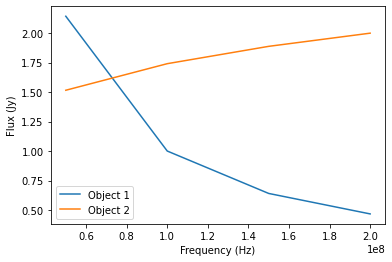

In [15]:
import matplotlib.pyplot as plt
from example_module import Spectra
from numpy import arange

##The frequencies I typically observe at are 50-250MHz
freqs = arange(50e+6,250e+6,50e+6)

##Setup two different instances of Spectra with
##the correct settings
spec1 = Spectra(flux=1,frequency=100e+6,SI=-1.1)
spec2 = Spectra(flux=2.,frequency=200e+6,SI=0.2)

##Extrapolate the spectra for the given fluxes
extrap1 = spec1.extrapolate_flux(freqs)
extrap2 = spec2.extrapolate_flux(freqs)

##Do the plot
plt.plot(freqs,extrap1,label='Object 1')
plt.plot(freqs,extrap2,label='Object 2')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Flux (Jy)')
plt.show()

<font color=red>Optional extension</font> - try making an instance of `Spectra` where you pass `SI` as a string. You'll get an error - try to understand why. There is a second `class` in `example_module` called `Spectra_fancier`. Import that, and pass the same arguments. Read the first line of output. Is this helpful? Inspect the code and try to understand how this works. Good code, especially code you share with others, should be written to handle user errors, and provide useful feedback when errors occur.


In [16]:
from example_module import Spectra_fancier
spec_test = Spectra_fancier(flux=1,frequency=100e+6,SI='-1.1')

SI must be a float, int, or array. Exiting program


SystemExit: 

/home/jline/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


***

Finally, you will have seen I have been writing docstrings in everything. Run the following:

In [17]:
print(help(Spectra))

Help on class Spectra in module example_module:

class Spectra(builtins.object)
 |  Spectra(SI, frequency, flux)
 |  
 |  A simple class to extrapolate and plot spectra for a basic astronomical radio source
 |  
 |  Methods defined here:
 |  
 |  __init__(self, SI, frequency, flux)
 |      Takes the spectral index, reference frequency, and refrence flux
 |      of a generic radio spectra and initiales the Spectra class.
 |      Caculate s0 as defined by the equation flux = S0*frequency**SI
 |  
 |  extrapolate_flux(self, frequencies)
 |      Extrapolate fluxes to match the given frequencies
 |  
 |  plot_spectra(self, frequencies)
 |      Do a basic plot of the spectra for these frequencies
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

None


docstrings make understanding a `class` and its capabilities far easier. They can be tedious to write but a good habit to form.

Ok! We've covered a large part of the way `python` works and the structures of the code. Let's start doing some more practical examples.

## `Fitting a line`
A useful thing to do with `python` is to fit models to data, to try and understand the physical processes behind them. Here we're going to start with the simplest model fit - a straight line. More often than not, when observing a process, we see noise and others errors. So, first up, let's make some noise.

### numpy.random.normal
Often noise on a physical process is 'normally' distributed, which means it follows the gaussian distribution. We can generate a random number from a aussian distribution by using `numpy.random.normal`. The probability density function for the gaussian distribution is

$$ p(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}}\exp\left( {\dfrac{(x-\mu)^2}{2\sigma^2}} \right) $$

where $\mu$ is the mean, and $\sigma$ is the standard deviation. `normal` takes the $\mu,\sigma$ as arguments, as well as the number of samples you wish to make. Let's do it, and then use `plt.hist` to make a histogram of our numbers:


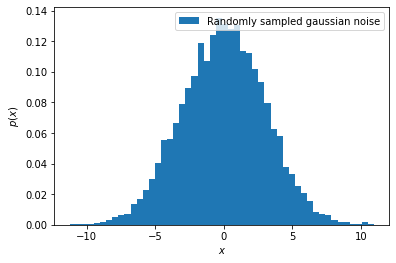

In [20]:
from numpy.random import normal
import matplotlib.pyplot as plt

##Define some vairables
mu, sigma, number_samples = 0, 3, 10000
##Take 10000 random samples from the gaussian distribution
noise = normal(mu, sigma, 10000)

##This line plots a histogram of our noise values
##The arguments are:
##data to plot, number of bins, make a normalised histogram (sums to one), give it a name
plt.hist(noise,50,density=True,label='Randomly sampled gaussian noise')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')

##plt.legend uses the label arguement from plt.hist to make a legend in the plot
plt.legend()
plt.show()

Try running the code a few times. Your plot should change everytime - this is because we are *randomly* choosing for the distribution. The histogram certainly *looks* like we've sampled a gaussian, but let's make sure.
***
## <font color=blue>Exercise 2.4</font>
Make a function that calculates $p(x)$ for the gaussian distribution, and plot it over the histogram above for the correct $\mu$,$\sigma$

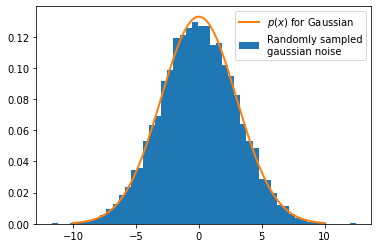

In [23]:
from numpy.random import normal
from numpy import sqrt,pi,exp,linspace
import matplotlib.pyplot as plt

def gauss(x,mu,sigma):
    '''Calculates the probability density function for the gaussian
    for a given x, mu, sigma'''
    return (1 / (sqrt(2*pi*sigma**2))) * exp(-((x - mu)**2 / (2*sigma**2)))

##Define some vairables
mu, sigma, number_samples = 0, 3, 10000
##Take 10000 random samples from the gaussian distribution
noise = normal(mu, sigma, 10000)

##This lines plots a histogram of our noise values
##The arguments are:
##data to plot, number of bins, make a normalised histogram, give it a name
plt.hist(noise,50,density=True,label='Randomly sampled\ngaussian noise')

x_values = linspace(-10,10,100)
plt.plot(x_values,gauss(x_values,mu,sigma),linewidth=2.0,label='$p(x)$ for Gaussian')
plt.legend()
plt.show()

***

## Simple line fitting
One simple but robust method for fitting data is via 'least-squares'. Our simple data points consist of $x_i,y_i$, where $i=1,...,n$, $x_i$ is an independent variable (the thing we set in our experiment) and $y_i$ is our dependent variable (the thing that we measure). We want to fit our data with some funciton $f(x,\gamma)$, where $\gamma$ are some parameters in our model that we can set. The goal of least-squares fitting is to minimise the difference between the observred data and the fitted model by minimising this sum:

$$ S = \sum_i^n (y_i - f(x_i,\gamma))^2 $$

This is achieved by adjusting the paramters in $\gamma$. To achieve this, we're going to use the `lmfit` package. First off, we'll set up a line function, and generate some observed data with added noise. Run the code below to and read the comments - we'll learn a few tricks as we go.

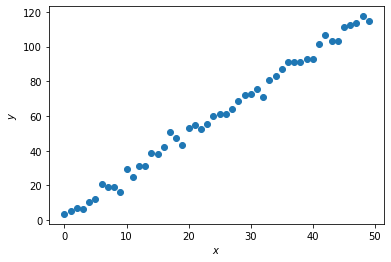

In [24]:
from numpy import arange

def straight_line(x,m,c):
    '''Returns a straight line with gradient m and 
    intercept c: y = m*x + c'''
    return m*x + c

##Assign some variables
m,c  = 2.4, 1.5

##Make a range of independent variables
##Inputting a single number n gives a range 
##of 0 to n-1
x_range = arange(50)

##Generate a straight_line
observed = straight_line(x_range,m,c)

##make some noise - set the number of points to be same
##as the length of x_range
nu,sigma = 0,3
noise = normal(nu,sigma,len(x_range))

## x += 1 is short for x = x + 1
##so the line below just adds the noise array to the observed array,
##and assigns the name observed to resulting array
observed += noise

##By adding 'bo' we asking to plot 'circles' instead of a line
##There are MANY plotting options for you to research.
plt.plot(x_range,observed,'o',label='Observed data')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Now we have a wobbly looking line! To utilise the least squares method, in this example we're going to use `lmfit`, a module with many pre-built models and fitting routines.

## `lmfit`
There are a large number of pre-built models for fitting in the `lmfit` package. Check out the list here: https://lmfit.github.io/lmfit-py/builtin_models.html. First thing we'll do is set up a linear model using `lmfit`:


In [25]:
from lmfit.models import LinearModel

##This creates a lmfit Model Class. We pass the optional argument prefix='line_'
##which labels all the parameters, making it easier to keep track of which
##variables belong to which model
linear_model = LinearModel(prefix='line_')

##This makes a Parameter Class that we can then act upon
linear_params = linear_model.make_params()

##We can set intial guess for parameter values - here we actually make
##a fairly bad guess of simply x=y
linear_params['line_slope'].set(value=1.0)
linear_params['line_intercept'].set(value=0.0)

Once the code above is run, we now have an `lmfit` model set and ready to fit the data to:

Original m,c 2.4 1.5
Our guess 2.364374546867075 2.3366865867016036


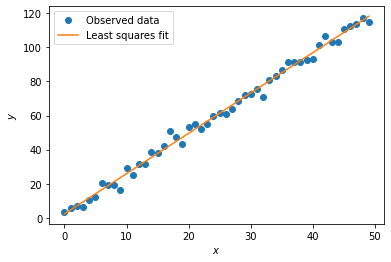

In [28]:

##Our data to fit is in the 'observed' array, measured over the
##values in 'x_range'. We use the 'linear_model' and
##'linear_params' objects made above to perform the least
##squares fit:
linear_fit = linear_model.fit(observed, linear_params, x=x_range)

##That's it! We've done the fit. We can look at our parameters:
m_guess = linear_fit.params['line_slope'].value
c_guess = linear_fit.params['line_intercept'].value

##How good was our guess?
print('Original m,c',m,c)
print('Our guess',m_guess,c_guess)


##Let's plot what we've done!
plt.plot(x_range,observed,'o',label='Observed data')

##Generate fit values using the linear_fit
fit_values = linear_fit.eval_components(x=x_range)
##Plot the values associated with the `line_` tag:
plt.plot(x_range,fit_values['line_'],'-',label='Least squares fit')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()



Woot! We have fitted a line, and it looks sensible. The actual values we get aren't that great however, because of the noise, which isn't taken into account in this least squares fit. We won't go into estimating the errors on our fitted values here, but it's a huge part of good science. 

That was a large amount of code to try and understand at once. As always, it's easier to digest code by writing it yourself. Let's do another exercise :-)

***
## <font color=blue>Exercise 2.5</font>
Take the code we used to generate and fit our noisy data, and use it to genereate a fit a 2nd order polynomial instead of a line. Do it in the box below.

Original a,b,c 0.2 0.7 -3.0
Least squares a,b,c 0.19513561056950757 0.9195272199901728 -6.288363053469729
Weighted Least Squares a,b,c 0.20248197920287597 0.5935657539216764 -2.6587661738243007


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

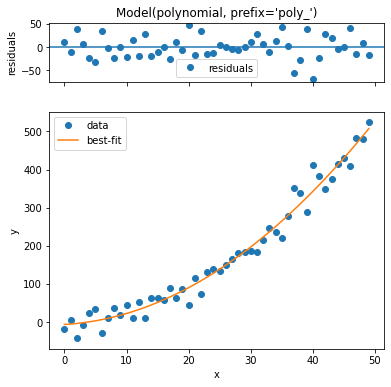

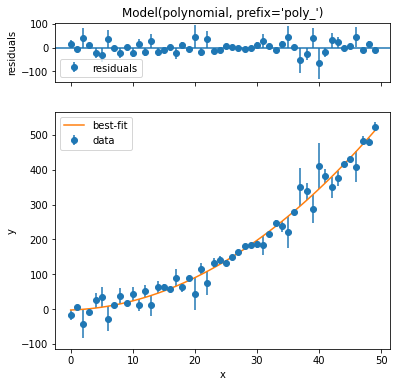

In [48]:
from numpy import *
import matplotlib.pyplot as plt
from numpy.random import normal
from example_module import polynomial
from lmfit.models import PolynomialModel


##Assign some variables
a,b,c = 0.2,0.7,-3.0

##Make a range of independent variables
##Inputting a single number n gives a range 
##of 0 to n-1
x_range = arange(50)

##Generate a straight_line
observed = polynomial(x_range,a,b,c)

##make some noise - set the number of points to be same
##as the length of x_range
nu,sigma = 0,20
noise = normal(nu,sigma,len(x_range))

## x += 1 is short for x = x + 1
##so the line below just adds the noise array to the observed array,
##and assigns the name observed to resulting array
observed += noise

##The first argument to PolynomialModel sets the order of the polnomial
poly_model = PolynomialModel(2, prefix='poly_')

##This makes a Parameter Class that we can then act upon
poly_params = poly_model.make_params()

poly_params['poly_c0'].set(value=1.0)
poly_params['poly_c1'].set(value=1.0)
poly_params['poly_c2'].set(value=1.0)


poly_fit = poly_model.fit(observed, poly_params, x=x_range)

c_ls = poly_fit.params['poly_c0'].value
b_ls = poly_fit.params['poly_c1'].value
a_ls = poly_fit.params['poly_c2'].value

##How good are our estimates?
print('Original a,b,c', a,b,c)
print('Least squares a,b,c', a_ls,b_ls,c_ls)


##Let's plot what we've done!
##lmfit has a nice inbuilt plotting attribute, which you 
##call simply like this:

poly_fit.plot()


##optional extension - use the weights argument to do a weighted least-squares

poly_fit = poly_model.fit(observed, poly_params, x=x_range,weights=1/noise)

c_wls = poly_fit.params['poly_c0'].value
b_wls = poly_fit.params['poly_c1'].value
a_wls = poly_fit.params['poly_c2'].value

print('Weighted Least Squares a,b,c', a_wls,b_wls,c_wls)

poly_fit.plot()

<font color=red>Optional extension</font> - you can incorporate errors into least squares, which is sometimes called 'weighted least squares'. In this case, the sum we try to minimise is:

$$ S = \sum_i^n \dfrac{(y_i - f(x_i,\gamma))^2}{\sigma_i^2} $$

where $\sigma_i$ is the error on the observed $y_i$. Try googling the `weights` argument for the `lmfit fit` method, and try and do a weighted least squares for this example.